# Тестовое задание

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# настройки для графиков
plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_palette('Pastel1')

In [3]:
# открытие файла
data = pd.read_excel('data.xlsx')

In [4]:
# создание списка с месяцами
months = ['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021']

In [5]:
# объявление функции, позволяющей сделать срез по месяцам
def range_by_month(start_month, end_month, df):
   
    start_ind = data.query('status == @start_month').index[0] + 1
    end_ind = data.query('status == @end_month').index[0]
    
    return df[start_ind:end_ind]

In [6]:
# объявление функции для расчета выручки
def revenue_calculate(df):
    
    return df.query('status != "ПРОСРОЧЕНО"')['sum'].sum()

## Вопрос 1

In [7]:
# подсчет выручки за июль 2021 по сделкам, приход денежных средств которых не просрочен
revenue_calculate(range_by_month(months[2], months[3], data))

859896.4699999997

Общая выручка за июль 2021 по сделкам, приход денежных средств которых не просрочен, составила 859 896,5 руб.

## Вопрос 2

In [8]:
# создание списка с помесячными значениями выручки
revenues = [
    revenue_calculate(range_by_month(months[0], months[1], data)),
    revenue_calculate(range_by_month(months[1], months[2], data)),
    revenue_calculate(range_by_month(months[2], months[3], data)),
    revenue_calculate(range_by_month(months[3], months[4], data)),
    revenue_calculate(range_by_month(months[4], months[5], data)),
    revenue_calculate(data[data.query('status == "Октябрь 2021"').index[0] + 1:])
]

In [9]:
# создание датафрейма с названием месяца и выручкой
dict = {'month': months, 'revenue': revenues}
df = pd.DataFrame(dict)

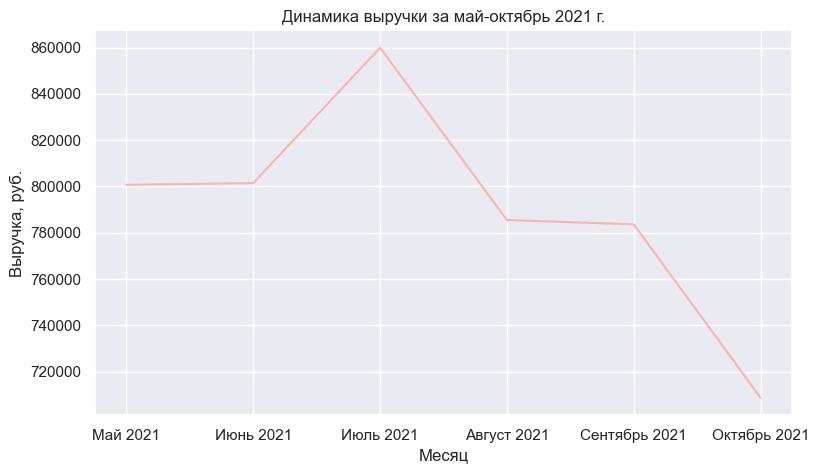

In [10]:
# построение графика динамики выручки
sns.lineplot(data=df, x='month', y='revenue')
plt.title('Динамика выручки за май-октябрь 2021 г.')
plt.xlabel('Месяц')
plt.ylabel('Выручка, руб.')
plt.show();

На основании построенного графика можно сделать вывод о том, что максимальное значение выручки было зафиксировано в июле 2021 г., а, начиная с августа, выручка начала снижаться. В октябре же наблюдалось минимальное значение за весь рассмотренный период.

## Вопрос 3

In [11]:
# вывод менеджеров с сортировкой по сумме привлеченных денежных средств за сентябрь 2021
range_by_month(months[4], months[5], data).query('status != "ПРОСРОЧЕНО"').groupby('sale', as_index=False)['sum'].sum().sort_values(by='sum', ascending=False)

,sale,sum
6,Смирнов,221525.70
0,Андреев,130983.80
5,Петрова,119724.86
2,Иванов,94770.60
3,Кузнецова,72228.40
8,Филимонова,59514.47
1,Васильев,45416.75
7,Соколов,35183.50
4,Михайлов,4268.70


В сентябре 2021 больше всего денежных средств привлек менеджер по фамилии Смирнов.

## Вопрос 4

In [12]:
# вывод количества сделок за октябрь 2021
data[data.query('status == "Октябрь 2021"').index[0] + 1:].groupby('new/current', as_index=False)['client_id'].count()

,new/current,client_id
0,новая,36
1,текущая,99


В октябре 2021 преобладали текущие сделки.

## Вопрос 5

In [13]:
# выгрузка данных за май 2021
df_may = range_by_month(months[0], months[1], data).drop(1)
df_may['receiving_date'] = pd.to_datetime(df_may['receiving_date']).dt.month

In [14]:
# расчет количества оригиналов договоров по майским сделкам, полученных в июне 2021
df_may.query('document == "оригинал" and receiving_date == 6')['client_id'].count()

76

В июне 2021 было получено 76 оригиналов договоров по сделкам, совершенным в мае 2021.

## Задание

In [15]:
# выгрузка данных за июнь 2021
df_june = range_by_month(months[1], months[2], data)
df_june['receiving_date'] = pd.to_datetime(df_june['receiving_date']).dt.month
df_june = df_june.rename(columns={'new/current': 'type'})
df_may = df_may.rename(columns={'new/current': 'type'})

Посмотрим на данные по новым сделкам за май и июнь 2021 г., удовлетворяющие условиям получения бонуса.

In [16]:
# выгрузка информации по новым сделкам за май-июнь в соответствии с условиями получения бонуса
df_may_new = df_may.query('type == "новая" and status == "ОПЛАЧЕНО" and document == "оригинал" and (receiving_date == 5 or receiving_date == 6)')
df_june_new = df_june.query('type == "новая" and status == "ОПЛАЧЕНО" and document == "оригинал" and receiving_date == 6')

display(df_may_new)
df_june_new

,client_id,sum,status,sale,type,Unnamed: 5,document,receiving_date
9,24.0,16347.70,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,6
56,100.0,503.70,ОПЛАЧЕНО,Васильев,новая,NaN,оригинал,6
58,108.0,6059.03,ОПЛАЧЕНО,Кузнецова,новая,NaN,оригинал,6
89,189.0,11003.70,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,6


,client_id,sum,status,sale,type,Unnamed: 5,document,receiving_date


Как мы видим, за июнь таких сделок нет.

Рассчитаем бонусы за заключенные сделки мая.

In [17]:
# расчет бонусов за заключение новых сделок в мае 2021 г.
df_may_new['bonus'] = df_may_new['sum'] * 0.07

Посмотрим на данные по текущим сделкам за май и июнь 2021 г., удовлетворяющие условиям получения бонуса.

In [18]:
# выгрузка информации по текущим сделкам за май-июнь в соответствии с условиями получения бонуса
df_may_cur = df_may.query('type == "текущая" and status != "ПРОСРОЧЕНО" and document == "оригинал" and (receiving_date == 5 or receiving_date == 6)')
df_june_cur = df_june.query('type == "текущая" and status != "ПРОСРОЧЕНО" and document == "оригинал" and receiving_date == 6')

display(df_may_cur)
df_june_cur

,client_id,sum,status,sale,type,Unnamed: 5,document,receiving_date
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,6
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,6
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,6
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,6
11,30.0,3833.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,6
...,...,...,...,...,...,...,...,...
121,270.0,5288.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,6
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,6
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,6
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,5


,client_id,sum,status,sale,type,Unnamed: 5,document,receiving_date


За июнь текущих сделок, удовлетворяющих условиям, также нет.

In [19]:
# расчет бонусов за текущие сделки в мае 2021 г.
def bonus_calculate(sum):
    if sum > 10000:
        return 0.05*sum
    else:
        return 0.03*sum
    
df_may_cur['bonus'] = df_may['sum'].apply(bonus_calculate)    

In [20]:
# объединение таблиц и расчет общей суммы бонусов менеджеров на 01.07.2021
df_may_new = df_may_new[['sale', 'bonus']]
df_may_cur = df_may_cur[['sale', 'bonus']]

df_may_new = pd.concat([df_may_new, df_may_cur])
df_may_new.groupby('sale', as_index=False)['bonus'].sum()

,sale,bonus
0,Андреев,4657.5427
1,Васильев,339.2310
2,Иванов,2503.8390
3,Кузнецова,2604.6716
4,Петрова,7028.8020
5,Селиванов,353.3220
6,Смирнов,4078.7240
7,Филимонова,409.6830
